In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import nltk
import pickle
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [2]:
url = "https://www.nhtsa.gov/technology-innovation/automated-vehicles-safety"
url_1 = 'https://www.nhtsa.gov/technology-innovation/automated-vehicles-safety'
url_2 = 'https://www.reuters.com/business/autos-transportation/vw-ceo-says-smart-cars-not-e-cars-are-gamechanger-2021-09-05/'
url_3 = 'https://www.nytimes.com/2019/07/17/business/self-driving-autonomous-cars.html'
url_list = [url_1, url_2, url_3]

In [3]:
import sys
def article_in_lists(url):
    size = sys.getsizeof(articles(url))
    return size

In [4]:
def articles(url):
    page = requests.get(url)
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(page.content, 'html5lib')
    contents = soup.find_all('p')
    news_content = []
    list_paragraphs = []
    
    for p in np.arange(0, len(contents)):
        paragraph = contents[p].get_text()
        list_paragraphs.append(paragraph)
        final_article = " ".join(list_paragraphs)
    news_content.append(final_article)
    return news_content

## CREATING A DATASET

In [5]:
#creating a dataframe for the latest vs oldest news with latest being 1 and old being 2

article_size=[]
for urls in url_list:
    size = article_in_lists(urls)
    article_size.append(size)
data = {'Article':['Automated Vehicles for Safety', 'Volkswagen CEO: smart cars, not e-cars, are gamechanger','Despite High Hopes, Self-Driving Cars Are ‘Way in the Future’'], 'Latest':[2, 1, 1], 'Daily views': ['100', '500', '100'], 'Size of article': [1025, 645, 785]}
df = pd.DataFrame(data)

In [6]:
df

,Article,Latest,Daily views,Size of article
0,Automated Vehicles for Safety,2,100,1025
1,"Volkswagen CEO: smart cars, not e-cars, are ga...",1,500,645
2,"Despite High Hopes, Self-Driving Cars Are ‘Way...",1,100,785


In [7]:
df.to_csv('Article.csv',index=False)

## EXPLORATORY DATA ANALYSIS

100    2
500    1
Name: Daily views, dtype: int64


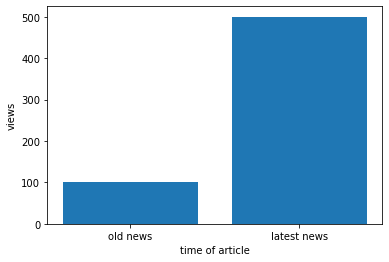

In [8]:
total_view = df['Daily views'].value_counts()
print(total_view)

#plotting graph
import matplotlib.pyplot as plt
data = [100,500]
plt.bar(range(len(data)), data)
plt.xticks([0,1], ['old news','latest news'])
plt.ylabel('views')
plt.xlabel('time of article')
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Size of article')

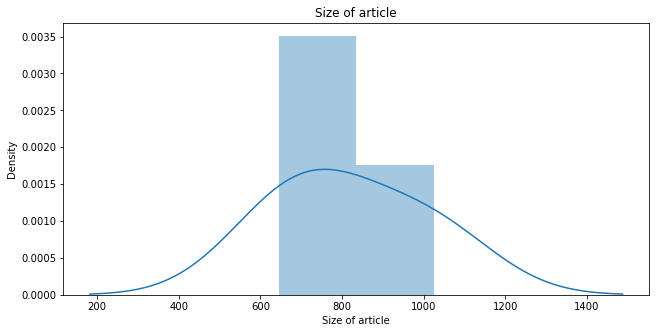

In [9]:
# plotting the graph for the article size from the dataset

plt.figure(figsize=(10.5,5))
sns.distplot(df['Size of article']).set_title('Size of article')

## FEATURE ENGINEERING

In [10]:
url = "https://www.nhtsa.gov/technology-innovation/automated-vehicles-safety"
page = requests.get(url)

In [11]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')
contents = soup.find_all('p')

In [12]:
news_content = []
list_paragraphs = []
for p in np.arange(0, len(contents)):
    paragraph = contents[p].get_text()
    list_paragraphs.append(paragraph)
    final_article = " ".join(list_paragraphs)
news_content.append(final_article)

In [13]:
news_content[0]

"The continuing evolution of automotive technology aims to deliver even greater safety benefits and automated driving systems (ADS) that — one day — can handle the whole task of driving when we don’t want to or can’t do it ourselves. Fully automated cars and trucks that drive us, instead of us driving them, will become a reality. These self-driving vehicles ultimately will integrate onto U.S. roadways by progressing through six levels of driver assistance technology advancements in the coming years. Driver assistance\xa0technologies in today’s motor vehicles are already helping to save lives and prevent injuries. A number of today’s new motor vehicles have technology that helps drivers avoid drifting into adjacent lanes or making unsafe lane changes, or that warns drivers of other vehicles behind them when they are backing up, or that brakes automatically if a vehicle ahead of them stops or slows suddenly, among other things. These and other safety technologies use a combination of har

In [14]:
df1 = pd.DataFrame()
df1['Content'] = news_content

In [15]:
# Removal of \r and \n among spaces as well

df1['Content_Parsed_1'] = df1['Content'].str.replace("\n ", " ")
df1['Content_Parsed_1'] = df1['Content_Parsed_1'].str.replace("\t", " ")
df1['Content_Parsed_1'] = df1['Content_Parsed_1'].str.replace("    ", " ")
df1['Content_Parsed_1'] = df1['Content_Parsed_1'].str.replace("\r", " ")
df1['Content_Parsed_1'] = df1['Content_Parsed_1'].str.replace("'", " ")
df1['Content_Parsed_1'] = df1['Content_Parsed_1'].str.replace('[', " ")
df1['Content_Parsed_1'] = df1['Content_Parsed_1'].str.replace('"', '')

<ipython-input-15-9b0697e326d8>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df1['Content_Parsed_1'] = df1['Content_Parsed_1'].str.replace('[', " ")


In [16]:
df1['Content_Parsed_1']

0    The continuing evolution of automotive technol...
Name: Content_Parsed_1, dtype: object

In [17]:
df1['Content_Parsed_2'] = df1['Content_Parsed_1'].str.lower()
punctuation_signs_list = list("?:!.,;""'''")
df1['Content_Parsed_3'] = df1['Content_Parsed_2']

#Removing the punctuation symbols/signs

for punct_sign in punctuation_signs_list:
    df1['Content_Parsed_3'] = df1['Content_Parsed_3'].str.replace(punct_sign, '')
    df1['Content_Parsed_4'] = df1['Content_Parsed_3'].str.replace("'s","")

<ipython-input-17-0a138442e677>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df1['Content_Parsed_3'] = df1['Content_Parsed_3'].str.replace(punct_sign, '')


In [18]:
df1

,Content,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4
0,The continuing evolution of automotive technol...,The continuing evolution of automotive technol...,the continuing evolution of automotive technol...,the continuing evolution of automotive technol...,the continuing evolution of automotive technol...


In [19]:
#Stemming and Lemmatization

wordnet_lemmatizer = WordNetLemmatizer()
nrows = len(df1)
lemmatized_text_list = []

for rows in range(0, nrows):
    
    #creating an empty list containing the lemmatized words
    lem_list =[]
    
    #saving the text and the words into an abject
    text_obj = df1.loc[rows]['Content_Parsed_4']
    words_obj = text_obj.split(" ")
    
    # performing iteration to every word for the lemmatization
    for word in words_obj:
        lem_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    #performing the join operation
    lem_text = " ".join(lem_list)
    
    # Appending to the list containing the texts
    lemmatized_text_list.append(lem_text)

df1['Content_Parsed_5'] = lemmatized_text_list

In [20]:
# Download the stop words list
nltk.download('stopwords')

#Loading the stop words in english
stop_words = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LaptopCheckout\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df1['Content_Parsed_6'] = df1['Content_Parsed_5']

for stop_word in stop_words:
    
    regex_stopword = r"\b" + stop_word + r"\b"
    df1['Content_Parsed_6'] = df1['Content_Parsed_6'].str.replace(regex_stopword, '')

<ipython-input-21-4620e9f939d9>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Content_Parsed_6'] = df1['Content_Parsed_6'].str.replace(regex_stopword, '')


In [22]:
df1.loc[0]['Content']

"The continuing evolution of automotive technology aims to deliver even greater safety benefits and automated driving systems (ADS) that — one day — can handle the whole task of driving when we don’t want to or can’t do it ourselves. Fully automated cars and trucks that drive us, instead of us driving them, will become a reality. These self-driving vehicles ultimately will integrate onto U.S. roadways by progressing through six levels of driver assistance technology advancements in the coming years. Driver assistance\xa0technologies in today’s motor vehicles are already helping to save lives and prevent injuries. A number of today’s new motor vehicles have technology that helps drivers avoid drifting into adjacent lanes or making unsafe lane changes, or that warns drivers of other vehicles behind them when they are backing up, or that brakes automatically if a vehicle ahead of them stops or slows suddenly, among other things. These and other safety technologies use a combination of har

In [23]:
df1.loc[0]['Content_Parsed_1']

'The continuing evolution of automotive technology aims to deliver even greater safety benefits and automated driving systems (ADS) that — one day — can handle the whole task of driving when we don’t want to or can’t do it ourselves. Fully automated cars and trucks that drive us, instead of us driving them, will become a reality. These self-driving vehicles ultimately will integrate onto U.S. roadways by progressing through six levels of driver assistance technology advancements in the coming years. Driver assistance\xa0technologies in today’s motor vehicles are already helping to save lives and prevent injuries. A number of today’s new motor vehicles have technology that helps drivers avoid drifting into adjacent lanes or making unsafe lane changes, or that warns drivers of other vehicles behind them when they are backing up, or that brakes automatically if a vehicle ahead of them stops or slows suddenly, among other things. These and other safety technologies use a combination of har

In [24]:
df1.loc[0]['Content_Parsed_2']

'the continuing evolution of automotive technology aims to deliver even greater safety benefits and automated driving systems (ads) that — one day — can handle the whole task of driving when we don’t want to or can’t do it ourselves. fully automated cars and trucks that drive us, instead of us driving them, will become a reality. these self-driving vehicles ultimately will integrate onto u.s. roadways by progressing through six levels of driver assistance technology advancements in the coming years. driver assistance\xa0technologies in today’s motor vehicles are already helping to save lives and prevent injuries. a number of today’s new motor vehicles have technology that helps drivers avoid drifting into adjacent lanes or making unsafe lane changes, or that warns drivers of other vehicles behind them when they are backing up, or that brakes automatically if a vehicle ahead of them stops or slows suddenly, among other things. these and other safety technologies use a combination of har

In [25]:
df1.loc[0]['Content_Parsed_3']

'the continuing evolution of automotive technology aims to deliver even greater safety benefits and automated driving systems (ads) that — one day — can handle the whole task of driving when we don’t want to or can’t do it ourselves fully automated cars and trucks that drive us instead of us driving them will become a reality these self-driving vehicles ultimately will integrate onto us roadways by progressing through six levels of driver assistance technology advancements in the coming years driver assistance\xa0technologies in today’s motor vehicles are already helping to save lives and prevent injuries a number of today’s new motor vehicles have technology that helps drivers avoid drifting into adjacent lanes or making unsafe lane changes or that warns drivers of other vehicles behind them when they are backing up or that brakes automatically if a vehicle ahead of them stops or slows suddenly among other things these and other safety technologies use a combination of hardware (senso

In [26]:
df1.loc[0]['Content_Parsed_4']

'the continuing evolution of automotive technology aims to deliver even greater safety benefits and automated driving systems (ads) that — one day — can handle the whole task of driving when we don’t want to or can’t do it ourselves fully automated cars and trucks that drive us instead of us driving them will become a reality these self-driving vehicles ultimately will integrate onto us roadways by progressing through six levels of driver assistance technology advancements in the coming years driver assistance\xa0technologies in today’s motor vehicles are already helping to save lives and prevent injuries a number of today’s new motor vehicles have technology that helps drivers avoid drifting into adjacent lanes or making unsafe lane changes or that warns drivers of other vehicles behind them when they are backing up or that brakes automatically if a vehicle ahead of them stops or slows suddenly among other things these and other safety technologies use a combination of hardware (senso

In [27]:
df1.loc[0]['Content_Parsed_5']

'the continue evolution of automotive technology aim to deliver even greater safety benefit and automate drive systems (ads) that — one day — can handle the whole task of drive when we don’t want to or can’t do it ourselves fully automate cars and truck that drive us instead of us drive them will become a reality these self-driving vehicles ultimately will integrate onto us roadways by progress through six level of driver assistance technology advancements in the come years driver assistance\xa0technologies in today’s motor vehicles be already help to save live and prevent injuries a number of today’s new motor vehicles have technology that help drivers avoid drift into adjacent lanes or make unsafe lane change or that warn drivers of other vehicles behind them when they be back up or that brake automatically if a vehicle ahead of them stop or slow suddenly among other things these and other safety technologies use a combination of hardware (sensors cameras and radar) and software to h

In [28]:
df1.loc[0]['Content_Parsed_6']

' continue evolution  automotive technology aim  deliver even greater safety benefit  automate drive systems (ads)  — one day —  handle  whole task  drive   ’ want   ’    fully automate cars  truck  drive us instead  us drive   become  reality  self-driving vehicles ultimately  integrate onto us roadways  progress  six level  driver assistance technology advancements   come years driver assistance\xa0technologies  today’ motor vehicles  already help  save live  prevent injuries  number  today’ new motor vehicles  technology  help drivers avoid drift  adjacent lanes  make unsafe lane change   warn drivers   vehicles behind     back    brake automatically   vehicle ahead   stop  slow suddenly among  things    safety technologies use  combination  hardware (sensors cameras  radar)  software  help vehicles identify certain safety risk    warn  driver  act  avoid  crash  continue evolution  automotive technology aim  deliver even greater safety benefit  – one day – deliver automate drive sy

In [29]:
df2 = pd.DataFrame()
df = pd.read_csv('Article.csv', index_col=0)
df2 = df.append(df1)

df.append(df2)
df.to_csv('Test.csv',index=False)
df2

,Latest,Daily views,Size of article,Content,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4,Content_Parsed_5,Content_Parsed_6
Automated Vehicles for Safety,2.0,100.0,1025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Volkswagen CEO: smart cars, not e-cars, are gamechanger",1.0,500.0,645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Despite High Hopes, Self-Driving Cars Are ‘Way in the Future’",1.0,100.0,785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,The continuing evolution of automotive technol...,The continuing evolution of automotive technol...,the continuing evolution of automotive technol...,the continuing evolution of automotive technol...,the continuing evolution of automotive technol...,the continue evolution of automotive technolog...,continue evolution automotive technology aim...


In [30]:
list_columns = ["Latest", "Daily views", "Content_Parsed_6"]
df2 = df2[list_columns]

In [31]:
list_columns = ["Latest", "Daily views", "Content_Parsed_6"]
df2 = df2[list_columns]

df2 = df2.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

In [32]:
Final_content = df2['Content_Parsed']

Final_content

Automated Vehicles for Safety                                                                                  NaN
Volkswagen CEO: smart cars, not e-cars, are gamechanger                                                        NaN
Despite High Hopes, Self-Driving Cars Are ‘Way in the Future’                                                  NaN
0                                                                 continue evolution  automotive technology aim...
Name: Content_Parsed, dtype: object

In [33]:
loaded_model = pickle.load(open('Latest-News-Classifier-master/0. Latest News Classifier/04. Model Training/Models/best_knnc.pickle', 'rb'))
X_train = pickle.load(open('Latest-News-Classifier-master/0. Latest News Classifier/03. Feature Engineering/Pickles/features_train.pickle', 'rb'))
y_train = pickle.load(open('Latest-News-Classifier-master/0. Latest News Classifier/03. Feature Engineering/Pickles/y_train.pickle', 'rb'))

In [34]:
X_train.shape

(1891, 300)